In [291]:
import pandas as pd
import numpy as np
data = pd.read_csv("virginia-history.xls", index_col=0)

In [292]:
num_positive_cases = np.flip(data.iloc[0:180]["positiveIncrease"].to_numpy())
time_index = np.arange(0,180)

In [293]:
num_positive_cases_30 = np.empty(6,np.float64)
time_index_30 = np.empty(6,np.float64)
index = 0
for i in range(6):
    num_positive_cases_30[i] = num_positive_cases[index]
    time_index_30[i] = time_index[index]
    index = index + 30

In [294]:
time_index_30

array([  0.,  30.,  60.,  90., 120., 150.])

In [305]:

vandermonde = np.array(
    [ 
    [1,time_index_30[0],time_index_30[0]**2,time_index_30[0]**3,time_index_30[0]**4,time_index_30[0]**5],
    [1,time_index_30[1],time_index_30[1]**2,time_index_30[1]**3,time_index_30[1]**4,time_index_30[1]**5],
    [1,time_index_30[2],time_index_30[2]**2,time_index_30[2]**3,time_index_30[2]**4,time_index_30[2]**5],
    [1,time_index_30[3],time_index_30[3]**2,time_index_30[3]**3,time_index_30[3]**4,time_index_30[3]**5],
    [1,time_index_30[4],time_index_30[4]**2,time_index_30[4]**3,time_index_30[4]**4,time_index_30[4]**5],
    [1,time_index_30[5],time_index_30[5]**2,time_index_30[5]**3,time_index_30[5]**4,time_index_30[5]**5]
    ]
)

In [306]:
coefficients = np.linalg.solve(vandermonde,num_positive_cases_30)

In [307]:
coefficients

array([ 5.68000000e+02,  1.21411667e+02, -6.18291667e+00,  1.08410494e-01,
       -7.80092593e-04,  1.97805213e-06])

In [308]:
inputIndex = 150

In [309]:
calculated = coefficients[0]+(np.float64)(coefficients[1]*(time_index[inputIndex]**1.0))+(np.float64)(coefficients[2]*(time_index[inputIndex]**2.0))+(np.float64)(coefficients[3]*(time_index[inputIndex]**3.0))+(np.float64)(coefficients[4]*(time_index[inputIndex]**4.0))+(np.float64)(coefficients[5]*(time_index[inputIndex]**5.0))

In [310]:
error = abs(calculated - num_positive_cases[inputIndex])

In [311]:
error

0.0

In [312]:
model_prediction = np.empty(len(time_index),np.float64)
for i in time_index:
    term0 = coefficients[0]
    term1 = (np.float64)(coefficients[1]*(time_index[i]**1.0))
    term2 = (np.float64)(coefficients[2]*(time_index[i]**2.0))
    term3 = (np.float64)(coefficients[3]*(time_index[i]**3.0))
    term4 = (np.float64)(coefficients[4]*(time_index[i]**4.0))
    term5 = (np.float64)(coefficients[5]*(time_index[i]**5.0))
    model_prediction[i] = term0+term1+term2+term3+term4+term5

In [313]:
import matplotlib.pyplot as plt

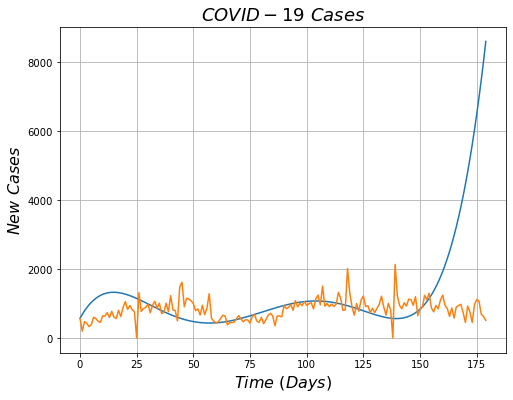

In [314]:
fig = plt.figure(figsize=(8,6))
plt.plot(time_index,model_prediction)
plt.plot(time_index,num_positive_cases)
for i in time_index:
    plt.plot(i,num_positive_cases[i])
plt.grid()
plt.xlabel('$Time\ (Days)$',fontsize=16)
plt.ylabel('$New\ Cases$',fontsize=16)
plt.title('$COVID-19\ Cases$',fontsize=18)
plt.show()

In [ ]:
#The polynomial model built using the Vandermonde matrix seems to be
#accurate for most of the time span. After day 150 it diverges from the
#real data because t=150 is the last data point used to build the
#interpolation model. The model could likely be improved by using t=179
#as an additional data point to build the interpolation model

In [315]:
modelHundredDays = model_prediction[0:100]

In [326]:
norm = np.linalg.norm(modelHundredDays)

In [327]:
norm

8727.206807979774